# **BMI Workflow Calculator using LangGraph**

This document outlines the steps to create a simple **Body Mass Index (BMI)** calculator workflow using **LangGraph**.

---

## **Workflow Overview**

The workflow consists of three main stages:

1. **Input Node**: Collects the user's height and weight.
2. **BMI Calculator Node**: Computes the BMI based on the provided input.
3. **Output Node**: Displays the calculated BMI.

---

### **Workflow Diagram**


'''
+---------------------+
|     Input Node      |
| (Height, Weight)    |
+----------+----------+
           |
           v
+---------------------+
|   BMI Calculator    |
|       Node          |
|  (Computes BMI)     |
+----------+----------+
           |
           v
+---------------------+
|    Output Node      |
| (Displays Result)   |
+---------------------+
'''

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.6/441.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.66
    Uninstalling langchain-core-0.3.66:
      Successfully uninstalled langchain-core-0.3.66


In [5]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict


In [6]:
# First we will define the STATES

class BMIstate(TypedDict):

    weight_kg: float
    height_mt: float
    bmi: float
    category: str
    

In [8]:
# Keep the function required for calculation of BMI

def calculate_bmi(state: BMIstate) -> BMIstate:
    # Inputs to BMI calculator
    weight = state["weight_kg"]
    height = state["height_mt"]

    #  calculate BMI
    bmi = weight/ (height ** 2)

    # now this bmi value will be updated to state

    state["bmi"] = round(bmi, 2)
    return state


def label_bmi(state: BMIstate) -> BMIstate:
    """
    Node to categorize BMI into underweight, normal, overweight, or obese.
    """
    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "underweight"
    elif 18.5 <= bmi < 24.9:
        state["category"] = "normal weight"
    elif 25 <= bmi < 29.9:
        state["category"] = "overweight"
    else:  # bmi >= 30
        state["category"] = "obese"

    return state

In [9]:
# Define Your GRAPH, create graph object using StateGraph

graph = StateGraph(BMIstate)  # pass your BMIstate in input

# now add node to your graph
graph.add_node('calculate_bmi' ,calculate_bmi )
graph.add_node('label BMI', label_bmi)

# Add edges to your graph that will direct the process

graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label BMI')
graph.add_edge('label BMI', END)

# compile your graph

workflow =graph.compile()



In [10]:
# Execute your graph
initial_state = {'weight_kg': 73, 'height_mt':1.72}
final_state =workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 73, 'height_mt': 1.72, 'bmi': 24.68, 'category': 'normal weight'}


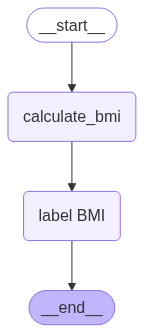

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

# 2. Basic Calculator


In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# create the State
class ClcState(TypedDict):

    num1: float
    num2: float
    operation: str
    result: float
    error_message: str


# Create function to perfoem different operation like "Addition", "Subtraction", "Dividion" and "Multiplication"

import math

def calculate(state: ClcState) -> ClcState:
    op = state['operation']
    a = state['num1']
    b = state['num2']

    try:
        if op == 'add':
            state['result'] = a + b
        elif op == 'sub':
            state['result'] = a - b
        elif op == 'mul':
            state['result'] = a * b
        elif op == 'div':
            if b == 0:
                state['error_message'] = "Division by zero is not allowed"
            else:
                state['result'] = a / b
        elif op == 'pow':
            state['result'] = a ** b
        elif op == 'mod':
            state['result'] = a % b
        elif op == 'sin':
            state['result'] = round(math.sin(math.radians(a)), 4)
        elif op == 'cos':
            state['result'] = round(math.cos(math.radians(a)), 4)
        elif op == 'tan':
            angle = math.radians(a)
            if math.isclose(math.cos(angle), 0, abs_tol=1e-9):
                state['error_message'] = "Tangent undefined at this angle"
            else:
                state['result'] = round(math.tan(angle), 4)
        else:
            state['error_message'] = f"Unknown operation '{op}'"
    except Exception as e:
        state['error_message'] = str(e)

    return state



# define nodes and edges of the graph
graph = StateGraph(ClcState)

# Add the node
graph.add_node("calculate", calculate)

# Add edges
graph.add_edge(START, "calculate")
graph.add_edge("calculate", END)


workflow = graph.compile()

# Try a sample operation
initial_state = {
    "num1": 12,
    "num2": 4,
    "operation": "div",
    "result": None,
    "error_message": None
}

final_state = workflow.invoke(initial_state)
print(final_state)



{'num1': 12, 'num2': 4, 'operation': 'div', 'result': 3.0, 'error_message': None}


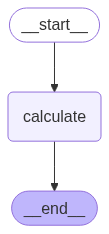

In [14]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())


In [15]:
test_cases = [
    {"num1": 3, "num2": 4, "operation": "add"},
    {"num1": 10, "num2": 3, "operation": "mod"},
    {"num1": 2, "num2": 3, "operation": "pow"},
    {"num1": 90, "num2": 0, "operation": "sin"},
    {"num1": 90, "num2": 0, "operation": "tan"},  # Should warn about undefined
    {"num1": 5, "num2": 0, "operation": "div"},
    {"num1": 7, "num2": 2, "operation": "unknown"}  # Invalid op
]

for test in test_cases:
    test.update({"result": None, "error_message": None})
    print(workflow.invoke(test))


{'num1': 3, 'num2': 4, 'operation': 'add', 'result': 7, 'error_message': None}
{'num1': 10, 'num2': 3, 'operation': 'mod', 'result': 1, 'error_message': None}
{'num1': 2, 'num2': 3, 'operation': 'pow', 'result': 8, 'error_message': None}
{'num1': 90, 'num2': 0, 'operation': 'sin', 'result': 1.0, 'error_message': None}
{'num1': 90, 'num2': 0, 'operation': 'tan', 'result': None, 'error_message': 'Tangent undefined at this angle'}
{'num1': 5, 'num2': 0, 'operation': 'div', 'result': None, 'error_message': 'Division by zero is not allowed'}
{'num1': 7, 'num2': 2, 'operation': 'unknown', 'result': None, 'error_message': "Unknown operation 'unknown'"}
